# Paired/Dependent T-test

**Definition**<br>
A dependent t-test is a parametric approach used to compare means between matched groups.<br> 

The matched groups can consist on:
* The same person under different treatments
* The same person measured before and after a treatment
* Match individuals in different treatment groups based on gender, age, etc.

## Data Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random as rnd
from random import sample
import statsmodels.api as sm
import scipy.stats as stats
import pingouin as pg

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

In [10]:
# Dataset of the change in Systolic Blood Pressure (SBP) before and after the use of a drug
link = 'https://raw.githubusercontent.com/alexxvives/Significance_tests/main/Data/dependent_Ttest_data.csv'
df = pd.read_csv(link, index_col=0)

df.head()

,Before,After
Pair,,
1,135,127
2,142,145
3,137,131
4,122,125
5,147,132


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Before,11.0,137.454545,11.509680,117.0,132.0,137.0,145.0,154.0
After,11.0,131.272727,9.111431,119.0,125.0,131.0,135.5,147.0


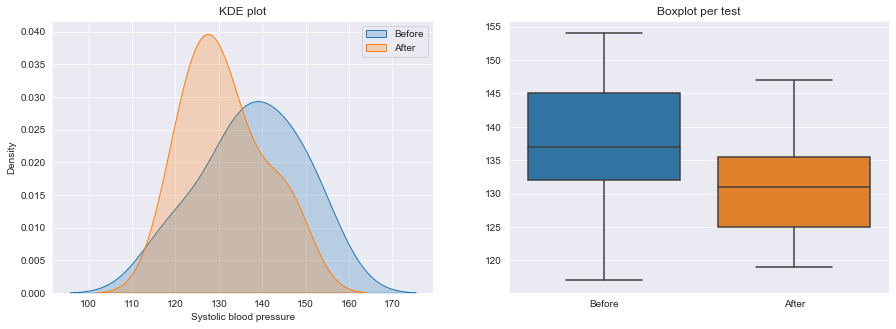

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.kdeplot(ax=axes[0], x=df['Before'], shade=True, label='Before')
sns.kdeplot(ax=axes[0], x=df['After'], shade=True, label='After')
axes[0].set_title("KDE plot")
axes[0].set_xlabel('Systolic blood pressure')
axes[0].legend()
sns.boxplot(ax=axes[1], data=df)
axes[1].set_title('Boxplot per test')

plt.show()

## Hypothesis

$H_0$: The difference in SBP before and after taking the drug is equal to zero<br>
$H_a$: The difference in SBP before and after taking the drug is not equal to zero

## Assumptions

* Assumption 1: The data collected follows a continuous or ordinal scale

* Assumption 2: The data (the difference for the matched-pairs) follows a normal distribution
* Assumption 3: The data is collected from a representative, randomly selected portion of the total population.
* Assumption 4: Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal (homogeneity of variance).

*Note, the assumptions are not strictly required. For example, it is possible to carry out the Mann-Whitney U test in Python if your data is not normally distributed. Another option is to transform the dependent variable using square root, log, or Box-Cox in Python.*

In [ ]:
diff = df['After'] - df['Before']

### Check Homogeneity of Variance Assumption

#### Levene's test
Levene's test is commonly used to test Homogeneity of variance between two samples.

$H_0$: The samples are from populations with equal variances.<br>
$H_a$: The samples are not from populations with equal variances.

In [104]:
t_stat = stats.levene(df['Before'], df['After'])[0]
p_value = stats.levene(df['Before'], df['After'])[1]
if p_value < 0.05: 
    print('(W statistic: {}, P-value: {}) REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))
else: 
     print('(W statistic: {}, P-value: {}) FAIL TO REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))

(W statistic: 0.604, P-value: 0.446) FAIL TO REJECT NULL HYPOTHESIS


### Check Normality Assumption

There are several methods to check whether our data is normally distributed:
* Jarque Bera test: Works properly in samples larger than 2000 observations
* Kolmogorov-Smirnov test: Non-parametric
* Anderson-Darling test: more powerful than K-S test since it considers all of the values in the data and not just the one that produces maximum distance
* Shapiro-Wilk test: This test is reliable for samples of a thousand observations or fewer

#### Jarque Bera test
Jarque-Bera is one of the normality tests or specifically a goodness of fit test of matching skewness and kurtosis to that of a normal distribution.

$H_0$: Sample skewness and sample kurtosis are not significantly different from normal distribution<br>
$H_a$: Sample skewness and sample kurtosis are significantly different from normal distribution

In [33]:
JB_flag = 0
t_stat = stats.jarque_bera(diff)[0]
p_value = stats.jarque_bera(diff)[1]
if p_value < 0.05: 
    print('(JB statistic: {}, P-value: {}) REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))
    JB_flag = 1
else: 
     print('(JB statistic: {}, P-value: {}) FAIL TO REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))

(JB statistic: 0.216, P-value: 0.898) FAIL TO REJECT NULL HYPOTHESIS


#### Kolmogorov-Smirnov test
One of the most frequently tests for normality is the Kolmogorov-Smirnov test (or K-S test). A major advantage compared to other tests is that Kolmogorov-Smirnov test is nonparametric, meaning that it is distribution-free.

$H_0$: Both samples come from the same distribution<br>
$H_a$: Both samples come from different distributions

In [42]:
KS_flag = 0
diff2 = np.random.normal(0, 1, 1000)
t_stat = stats.kstest(diff, cdf='norm')[0]
p_value = stats.kstest(diff, cdf='norm')[1]
if p_value < 0.05:
    print('(K-S statistic: {}, P-value: {}) REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))
    KS_flag = 1
else:
    print('(K-S statistic: {}, P-value: {}) FAIL TO REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))

(K-S statistic: 0.727, P-value: 0.0) REJECT NULL HYPOTHESIS


#### Anderson-Darling test
Anderson-Darling test is a modification of Kolmogorov-Smirnov test. It tests whether a given sample of observations is drawn from a given probability distribution (in our case from normal distribution).

$H_0$: The sample comes from the normal distribution<br>
$H_a$: The sample does not come from the normal distribution

In [35]:
A_flag = 0
t_stat = stats.anderson(diff, dist='norm')[0]
p_value = stats.anderson(diff, dist='norm')[1][2]
if p_value < 0.05:
    print(' (A statistic: {}, P-value: {}) REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))
    A_flag = 1
else:
    print('(A statistic: {}, P-value: {}) FAIL TO REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))

(A statistic: 0.162, P-value: 0.68) FAIL TO REJECT NULL HYPOTHESIS


#### Shapiro-Wilk test
Anderson-Darling test is a modification of Kolmogorov-Smirnov test. It tests whether a given sample of observations is drawn from a given probability distribution (in our case from normal distribution).

$H_0$: The distribution of the sample is not significantly different from a normal distribution<br>
$H_a$: The distribution of the sample is significantly different from a normal distribution

In [36]:
W_flag = 0
t_stat = stats.shapiro(diff)[0]
p_value = stats.shapiro(diff)[1]
if p_value < 0.05:
    print('(W statistic: {}, P-value: {}) REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))
    W_flag = 1
else:
    print('(W statistic: {}, P-value: {}) FAIL TO REJECT NULL HYPOTHESIS'.format(round(t_stat, 3), round(p_value, 3)))

(W statistic: 0.981, P-value: 0.971) FAIL TO REJECT NULL HYPOTHESIS


#### QQ plot + Histogram

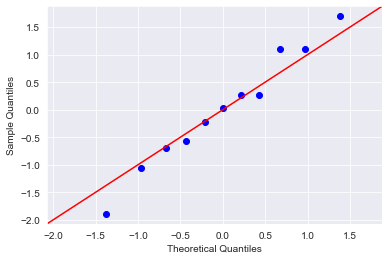

In [40]:
sm.qqplot(data=diff, line='45', fit=True);
plt.show()

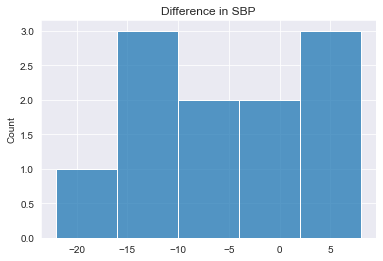

In [46]:
sns.histplot(diff)
plt.title('Difference in SBP')
plt.show()

#### Conclusion

In [47]:
tests_dict = {}

for test in ['Jarque Bera test', 'Kolmogorov-Smirnov test', 'Anderson-Darling test', 'Shapiro-Wilk test']:
    if test == 'Jarque Bera test':
        if JB_flag == 1: tests_dict[test] = 'REJECT'
        else: tests_dict[test] = 'FAIL TO REJECT'
        
    if test == 'Kolmogorov-Smirnov test':
        if KS_flag == 1: tests_dict[test] = 'REJECT'
        else: tests_dict[test] = 'FAIL TO REJECT' 
        
    if test == 'Anderson-Darling test':
        if A_flag == 1: tests_dict[test] = 'REJECT'
        else: tests_dict[test] = 'FAIL TO REJECT'
        
    if test == 'Shapiro-Wilk test':
        if W_flag == 1: tests_dict[test] = 'REJECT'
        else: tests_dict[test] = 'FAIL TO REJECT'

pd.DataFrame.from_dict(tests_dict, orient='index', columns=['Null Hypothesis (Normality)'])

,Null Hypothesis (Normality)
Jarque Bera test,FAIL TO REJECT
Kolmogorov-Smirnov test,REJECT
Anderson-Darling test,FAIL TO REJECT
Shapiro-Wilk test,FAIL TO REJECT


The data does follow a normal distribution!

## T-test

In [91]:
result = pg.ttest(df['Before'], df['After'], paired=True)
result

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.340102,10,two-sided,0.041332,"[0.3, 12.07]",0.595548,1.975,0.430867


#### P-value
If the null hypothesis is true (drug is not effective), there is a 4.13% chance of seeing a difference of 6.18 or more by chance between samples.

#### T statistic

The T statistic is a ratio between the difference between two groups and the difference within the groups. The larger the T statistic, the more difference there is between groups. The smaller the T statistic, the more similarity there is between groups.<br>

$$t = \frac{\overline{d} - \mu}{\frac{s}{\sqrt{n}}}$$

* *Where $\overline{d}$ is the mean of the difference* <br>
* *s is the standard deviation of the difference* <br>
* *n is the sample size* <br>

In [95]:
SE = diff.std()/np.sqrt(len(df)) # Standard Error
t_score = (diff.mean() - 0) / SE

-2.3401020679234024


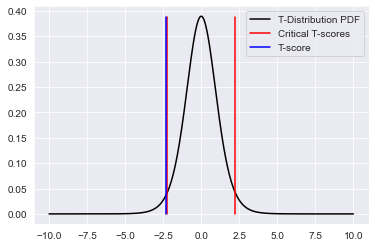

Critical T-score: +-2.228 and T-score: -2.34


In [68]:
## Setup      
dof = len(df)-1       # Degrees of freedom
alpha = 0.05    # Significence level
ntails = 2      # Number of tails 

## Calculate critical t
critical_t = stats.t.ppf(q=1-(alpha/2),df=dof)

plt.figure()
xs = np.linspace(-10,10,1000)
plt.plot(xs, stats.t.pdf(xs,dof), 'k', label="T-Distribution PDF")

## Plot some vertical lines representing critical t-score cutoff
plt.axvline(critical_t, ymin=0.045, ymax=0.95, color='red', label='Critical T-scores')
if ntails == 2: 
    plt.axvline(-critical_t, ymin=0.045, ymax=0.95, color='red')
plt.axvline(t_score, ymin=0.045, ymax=0.95, color='blue', label='T-score')
plt.legend()
plt.show()

print('Critical T-score: +-{} and T-score: {}'.format(round(critical_t,3),round(float(t_score),3)))

#### Confidence Interval

If we take 100 random samples from the population, we would expect 95% of the samples to have a difference in the range: [0.3, 12.07]

#### Cohen's D

Also referred as Standardized Mean Difference, Cohen's D is one of the most common ways to measure effect size (how large an effect is). For example, medication A has a larger effect than medication B. While a p-value can tell you if there is an effect, it won't tell you how large that effect is.
Cohen (1988) suggested that d=0.2 should be considered a 'small' effect size, 0.5 is a 'medium' effect size, and that 0.8 is a 'large' effect size. This means that if two groups' means don't differ by 0.2 standard deviations or more, the difference is trivial, even if it is statistically significant.

#### BF10

30-100: Very strong evidence for $H_a$<br>
10-30: Strong evidence for $H_a$<br>
3-10: Moderate evidence for $H_a$<br>
**1-3: Little evidence for $H_a$**<br>
1: No evidence<br>
1-3: Little evidence for $H_0$<br>
3-10: Moderate evidence for $H_0$<br>
10-30: Strong evidence for $H_0$<br>
30-100: Very strong evidence for $H_0$<br>

#### Power

The probability of rejecting the Null Hypothesis when it is false (correct decision).

## Conclusion

The results from the test based on the "before" data (M = 137.45, SD = 11.5) and "After" data (M = 131.27, SD = 9.11) suggest that the treatment resulted in a reduction of Systolic Blood Pressure, t(10) = -2.34, p < 0.05